# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad Semana 6 y 7

### **Vectores Embebidos Pre-entrenados: Fasttext**

#### **Nombres y matrículas de los integrantes del equipo:**



*   A01700316 Manuel Alejandro Alonso Troche
*   A01794415 Jose Alberto Almada Gerardo
*   A01795401 Jhamyr Arnulfo Alcalde Oballe
*   A01794894 Manuel Alemán Cueto
*   A01793554 Jesus Esteiner Alonso Moreno
*   Elemento de lista



##**Pregunta - 1:**



Descarga el archivo noticiasTopicModeling.txt que se encuentra en Canvas. Este archivo consiste en
5658 noticias de varios periódicos de España. El archivo de texto es una lista en el siguiente
formato:
[{“titular”:”Encabezado“, “texto”:”Cuerpo”}, … , {“titular”:”Encabezado”,”texto”:”Cuerpo”}]
Donde “titular” es el encabezado de la noticia y “texto” es el cuerpo del texto de dicha noticia. En
particular en esta actividad trabajarás solamente con los cuerpos de las noticias, sin incluir los
encabezados. Carga dicho archivo y genera un DataFrame de Pandas llamado “df” y que contiene
una única columna llamada “noticia” con 5658 renglones formados por los cuerpos de las noticias.

In [1]:
import json
import pandas as pd

# Definir la ruta del archivo
file_path = "/content/noticiasTopicModeling.txt"

# Función para cargar el archivo JSON
def load_json(file_path):
    try:
        with open(file_path, "r", encoding="utf-8") as file:
            data = json.load(file)
        return data
    except json.JSONDecodeError as e:
        print(f"Error al decodificar JSON en la línea {e.lineno}, columna {e.colno}: {e.msg}")
        print(f"Posición del carácter: {e.pos}")
        return None

# Función para convertir JSON a DataFrame
def json_to_dataframe(json_data):
    try:
        df = pd.json_normalize(json_data)
        return df
    except ValueError as e:
        print(f"Error al convertir JSON a DataFrame: {e}")
        return None

# Cargar el archivo JSON
json_data = load_json(file_path)

# Convertir JSON a DataFrame si la carga fue exitosa
if json_data:
    df = json_to_dataframe(json_data)
    if df is not None:
        print("DataFrame creado exitosamente")
        print(df.head())
    else:
        print("No se pudo crear el DataFrame")
else:
    print("No se pudo cargar el archivo JSON")

DataFrame creado exitosamente
                                             titular  \
0  Vox se sube a la ola de la extrema derecha eur...   
1  Mensajes xenófobos de Vox y la cancelación de ...   
2  El Gobierno alega el estado de alarma para no ...   
3                                         La fiscala   
4  La CorteIDH pide a Panamá informe sobre migran...   

                                               texto  
0  "España ha dejado de ser católica", decía Manu...  
1  El clima de crispación social en Ceuta ha lleg...  
2  El Gobierno ha alegado la suspensión de plazos...  
3  Puedes mandar tu pregunta, sugerencia o queja ...  
4  Panamá debe entregar esta semana a la Corte In...  


In [2]:
# Instalando el modelo "es_core_news_sm" de spaCy en Google Colab
!pip install -U spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 18.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
df

,titular,texto
0,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu..."
1,Mensajes xenófobos de Vox y la cancelación de ...,El clima de crispación social en Ceuta ha lleg...
2,El Gobierno alega el estado de alarma para no ...,El Gobierno ha alegado la suspensión de plazos...
3,La fiscala,"Puedes mandar tu pregunta, sugerencia o queja ..."
4,La CorteIDH pide a Panamá informe sobre migran...,Panamá debe entregar esta semana a la Corte In...
...,...,...
5653,El juez del caso Villarejo cita como imputado ...,"El juez del caso Villarejo, Manuel García-Cast..."
5654,El perfil del contagiado de coronavirus tras l...,España se acerca a los 260.000 casos de COVID-...
5655,"Transferencias, préstamos y reformas, pero sin...","Transferencias, préstamos y condiciones. ""Nunc..."
5656,23 libros que correremos a buscar cuando las l...,"El 14 de marzo, ante la declaración del estado..."


In [4]:
# Verifiquemos la información del DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5658 entries, 0 to 5657
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   titular  5658 non-null   object
 1   texto    5658 non-null   object
dtypes: object(2)
memory usage: 88.5+ KB


In [5]:
# Y veamos sus primeros registros:
df.head()

,titular,texto
0,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu..."
1,Mensajes xenófobos de Vox y la cancelación de ...,El clima de crispación social en Ceuta ha lleg...
2,El Gobierno alega el estado de alarma para no ...,El Gobierno ha alegado la suspensión de plazos...
3,La fiscala,"Puedes mandar tu pregunta, sugerencia o queja ..."
4,La CorteIDH pide a Panamá informe sobre migran...,Panamá debe entregar esta semana a la Corte In...


##**Pregunta - 2:**

Realiza un proceso de limpieza. Aplica el preprocesamiento que consideres adecuado para texto en
español. Recuerda que el objetivo es identificar los tokens (palabras) que describan mejor la
distribución de cada tema.
NOTA: Recuerda que esta es una técnica no supervisada, por lo que no requerimos hacer una
partición de los datos.

Para el proceos de liempieza se seguirán los sigueintes pasos:
- Convertir a minusculas
- Eliminar signos de puntuacion
- Elimnar numeros
- Elimnar espacios en blanco extra
- Tokenizacion
- LEmatizacion (spacy)

In [6]:
import spacy
import re
import nltk
from nltk.corpus import words
from multiprocessing import Pool
from tqdm import tqdm

# Descargar palabras en español de nltk
nltk.download('words')
nltk.download('punkt')

# Cargar el modelo de spaCy para español con componentes desactivados
nlp = spacy.load('es_core_news_sm')

# Obtener palabras vacías en español de spaCy
stop_words_es = spacy.lang.es.stop_words.STOP_WORDS

# Función para limpiar el texto
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    # Eliminar signos de puntuación y caracteres especiales
    texto = re.sub(r'[^\w\s]', '', texto)
    # Eliminar números
    texto = re.sub(r'\d+', '', texto)
    # Eliminar espacios extra
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

# Función para procesamiento paralelo
def process_row(texto):
    texto_limpio = limpiar_texto(texto)
    # Tokenizar y filtrar palabras vacías y verbos con spaCy
    doc = nlp(texto_limpio)
    tokens = [token.lemma_ for token in doc if token.lemma_ not in stop_words_es and token.pos_ != 'VERB']
    return texto_limpio, tokens

# Tomar la columna "texto"
textos = df['texto'].tolist()

# Usar multiprocessing para acelerar el procesamiento
with Pool(processes=4) as pool:
    results = list(tqdm(pool.imap(process_row, textos), total=len(textos)))

# Separar los resultados en columnas del DataFrame
df['texto_limpio'], df['tokens'] = zip(*results)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
100%|██████████| 5658/5658 [15:50<00:00,  5.95it/s]


In [7]:
df.head()

,titular,texto,texto_limpio,tokens
0,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu...",españa ha dejado de ser católica decía manuel ...,"[españa, católico, manuel, azaña, comienzo, re..."
1,Mensajes xenófobos de Vox y la cancelación de ...,El clima de crispación social en Ceuta ha lleg...,el clima de crispación social en ceuta ha lleg...,"[clima, crispación, social, ceuta, punto, prec..."
2,El Gobierno alega el estado de alarma para no ...,El Gobierno ha alegado la suspensión de plazos...,el gobierno ha alegado la suspensión de plazos...,"[gobierno, suspensión, plazo, derivado, declar..."
3,La fiscala,"Puedes mandar tu pregunta, sugerencia o queja ...",puedes mandar tu pregunta sugerencia o queja a...,"[pregunta, sugerencia, queja, formulario, susá..."
4,La CorteIDH pide a Panamá informe sobre migran...,Panamá debe entregar esta semana a la Corte In...,panamá debe entregar esta semana a la corte in...,"[panamá, deber, semana, corte, interamericán, ..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5658 entries, 0 to 5657
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   titular       5658 non-null   object
 1   texto         5658 non-null   object
 2   texto_limpio  5658 non-null   object
 3   tokens        5658 non-null   object
dtypes: object(4)
memory usage: 176.9+ KB


#**PARTE 1 Pregunta - 3:**

Encontrar la matriz Tf-idf de la columna de noticias. Despliega los primeros 5 renglones con
algunas de sus columnas con sus nombres, donde las columnas son los tokens. ¿Cuál es el
significado de cada renglón? ¿Y el significado de cada columna?


Renglones.- Cada fila representa un documento (una noticia) en el corpus.

Columnas.- Cada columna representa un término del vocabulario total extraído de todas las noticias.

Valores.- El valor en la posición (i, j) de la matriz Tf-idf representa el peso Tf-idf del término j en el documento i. Este peso refleja la importancia del término en el documento específico, ajustado por su frecuencia en todo el corpus.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ajustar los parámetros del vectorizador TF-IDF para el español
tfidf = TfidfVectorizer(lowercase=True,
                        max_df=1.0,    # Ajusta este valor para filtrar términos frecuentes poco relevantes
                        min_df=1)       # Ajusta este valor para eliminar términos poco frecuentes

# Calcular la matriz TF-IDF directamente desde la columna 'texto_limpio'
tfidf_sparse = tfidf.fit_transform(df['texto_limpio'].to_list())

# Convertir la matriz dispersa a un DataFrame denso
tfidf_dense = pd.DataFrame(tfidf_sparse.toarray(), columns=tfidf.get_feature_names_out())

In [10]:
tfidf_dense.head(5)

,__,___guia_de_actuacio,___tabla_resumen_y_ex,__luisplanas,_avt_,_barallobre,_deanfuentes,_gafas_y_reloj_,_miguelhernan,_obliga,...,張雨軒,赵立坚,ｖａｐｏｒｗａｖｅ,𝐆𝐨𝐫𝐫𝐨𝐭𝐱𝐚𝐭𝐞𝐠𝐢,𝐌𝐢𝐫𝐞𝐧,𝔻𝕒𝕧𝕚𝕕,𝔾𝕒𝕣𝕔𝕚𝕒,𝗿𝗲𝗴𝗿𝗲𝘀𝗼,𝙺𝚊𝚕𝚕𝚎𝚛𝚐𝚒𝚜,𝙺𝚘𝚜𝚝𝚊𝚜
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Mostrar la información del DataFrame Tf-idf
tfidf_dense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5658 entries, 0 to 5657
Columns: 102929 entries, __ to 𝙺𝚘𝚜𝚝𝚊𝚜
dtypes: float64(102929)
memory usage: 4.3 GB


#**PARTE 1 Pregunta - 4:**

Aplica el método de descomposición de valores singulares truncado a la matriz Tf-idf anterior con
10 componentes y obtener el gráfico de la importancia relativa de estas.

In [12]:
from sklearn.decomposition import TruncatedSVD

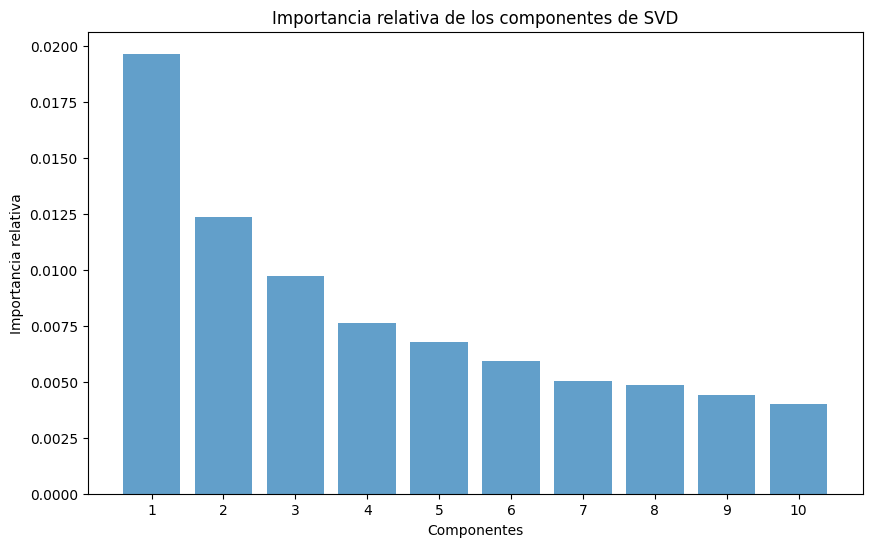

In [13]:
import matplotlib.pyplot as plt

# Aplicar Truncated SVD
svd = TruncatedSVD(n_components=10)
X_svd = svd.fit_transform(tfidf_sparse)

# Graficar la importancia relativa de los componentes
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), svd.explained_variance_ratio_, alpha=0.7)
plt.xlabel('Componentes')
plt.ylabel('Importancia relativa')
plt.title('Importancia relativa de los componentes de SVD')
plt.xticks(range(1, 11))
plt.show()

#**PARTE 1 Pregunta - 5:**

Obtener la matriz tokens-temas (term-topic) a partir de la matriz V
்
de la descomposición SVD.

Despliega sus primeros 5 renglones donde se incluya el nombre de las columnas.

In [14]:
# Obtener la matriz V
V_matrix = svd.components_.T

# Crear un DataFrame para la matriz tokens-temas
tokens = tfidf.get_feature_names_out()
term_topic_df = pd.DataFrame(V_matrix, index=tokens, columns=[f'Topic {i+1}' for i in range(V_matrix.shape[1])])

# Mostrar los primeros 5 renglones
term_topic_df.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
__,0.000028,-0.000073,-0.000090,0.000100,-0.000048,-0.000040,-0.000025,0.000036,-0.000040,-0.000261
___guia_de_actuacio,0.000025,0.000125,0.000136,-0.000171,0.000026,-0.000111,-0.000168,-0.000108,-0.000521,0.000005
___tabla_resumen_y_ex,0.000026,0.000038,0.000216,-0.000115,0.000069,-0.000261,-0.000056,-0.000103,-0.000443,0.000025
__luisplanas,0.000008,0.000038,-0.000121,0.000030,0.000007,-0.000038,0.000050,-0.000001,0.000045,0.000085
_avt_,0.000018,-0.000257,0.000131,0.000176,0.000072,-0.000017,-0.000005,-0.000019,-0.000293,-0.000215


In [15]:
term_topic_df.shape

(102929, 10)

#**PARTE 1 Pregunta - 6:**
Con base a la cantidad de conceptos latentes que determinaste en el ejercicio anterior, obtener cada
uno de sus gráficos con sus 10 términos/tokens más importantes. ¿Cómo describirías cada uno de
dichos conceptos latentes? ¿Se identifican claramente las temáticas de cada uno de ellos?


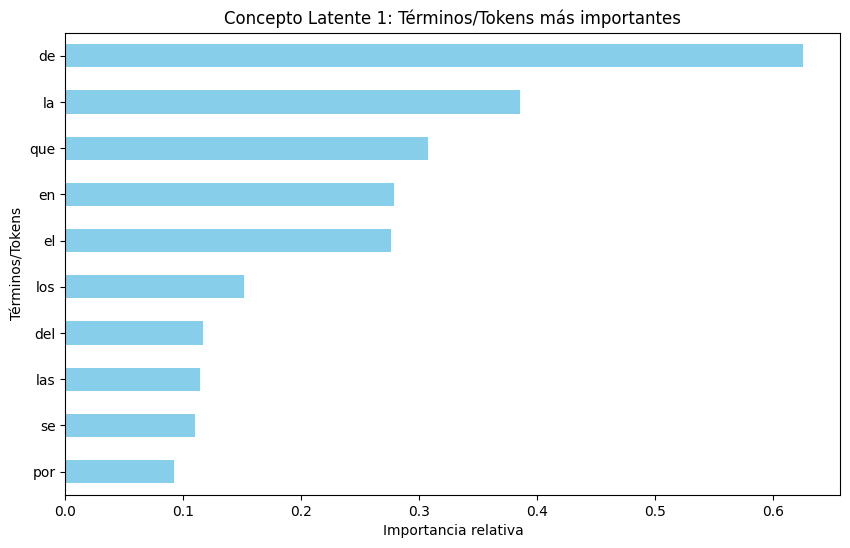

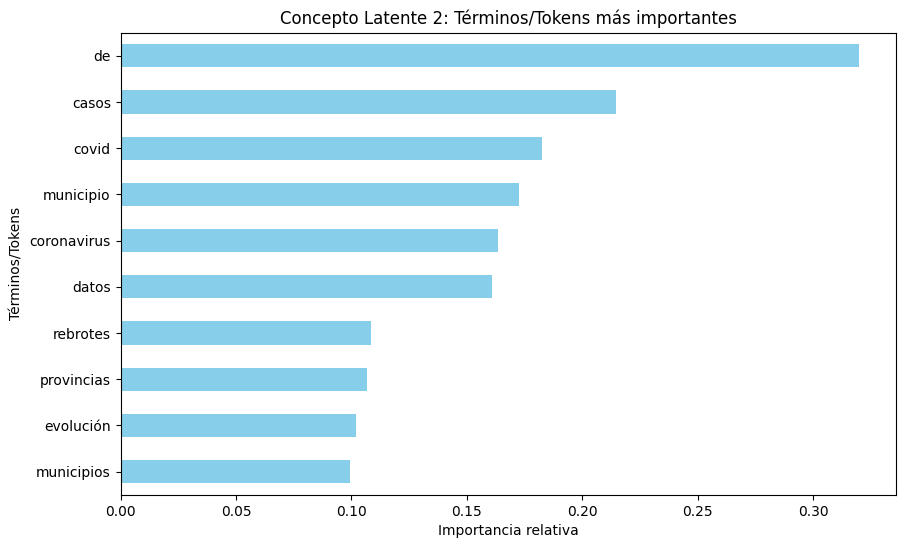

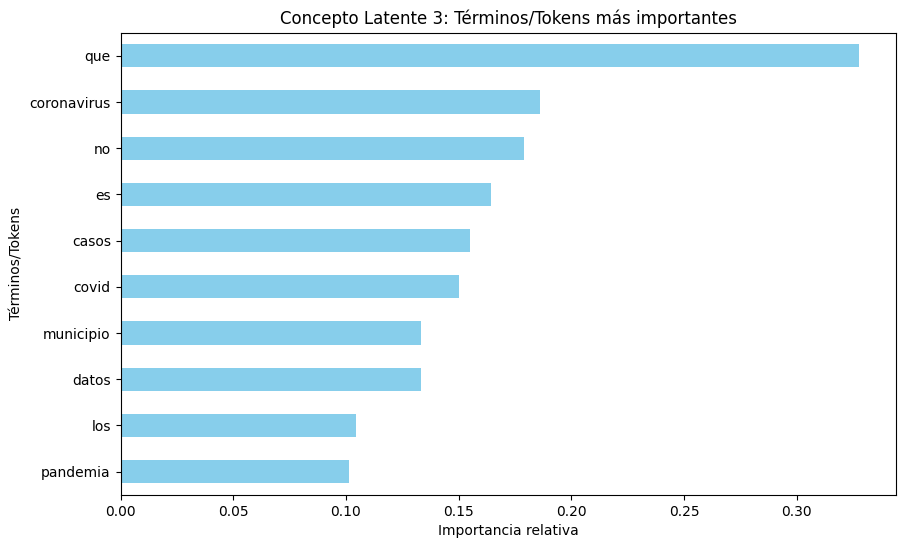

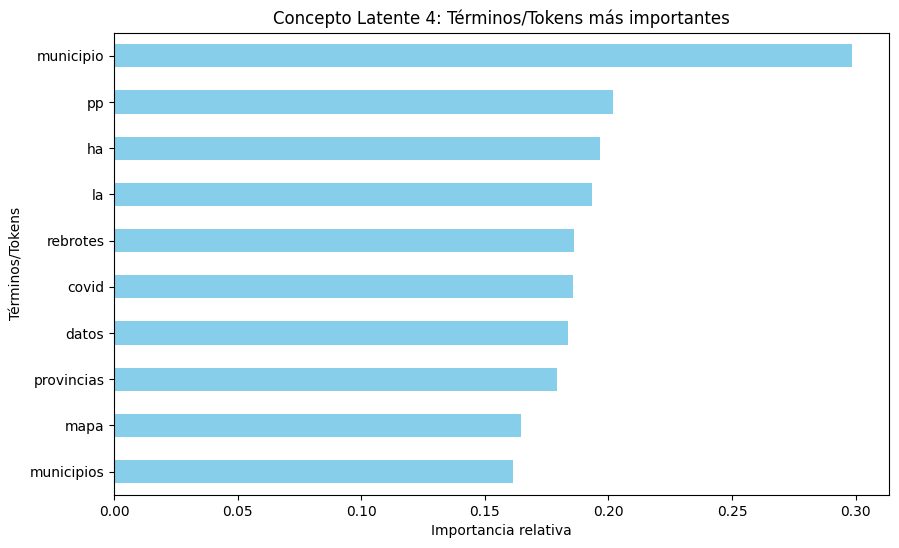

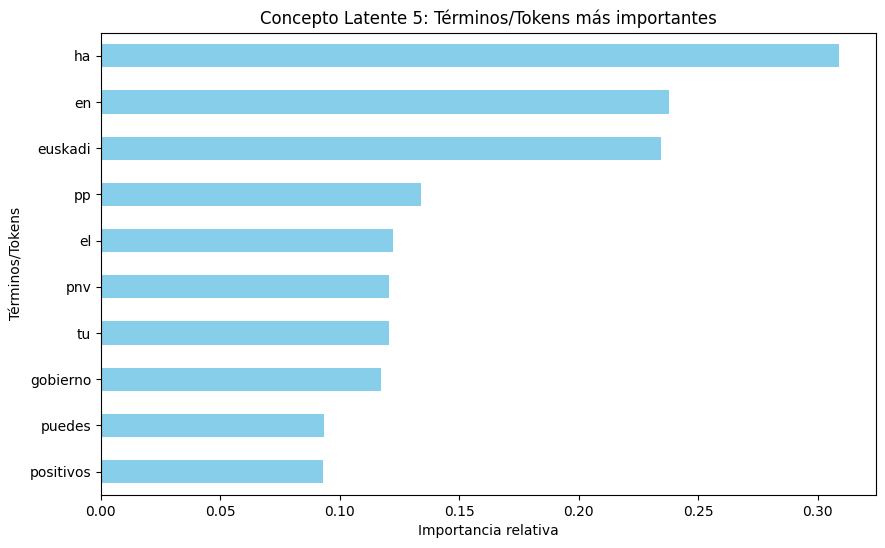

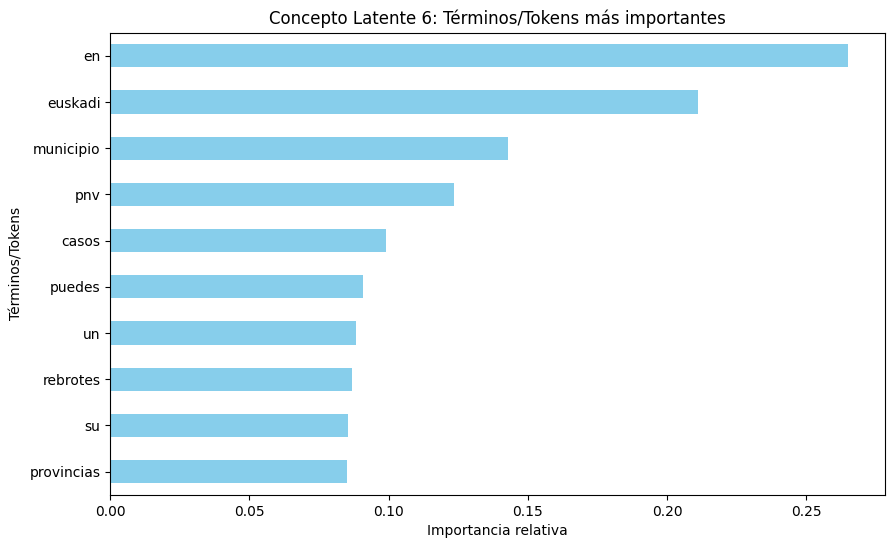

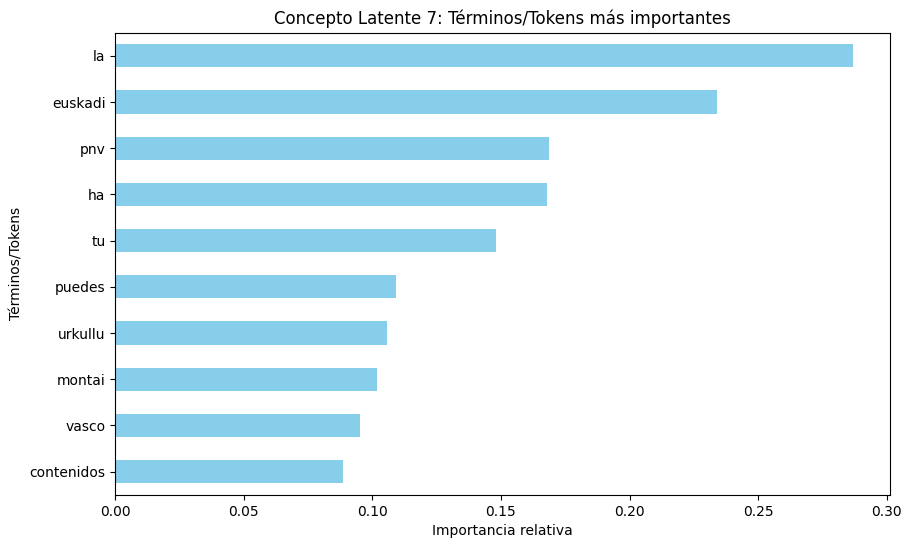

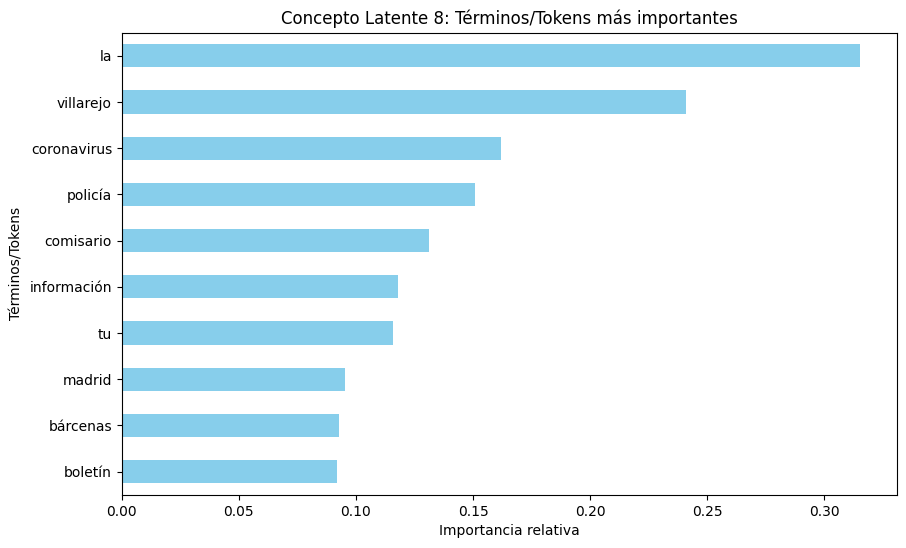

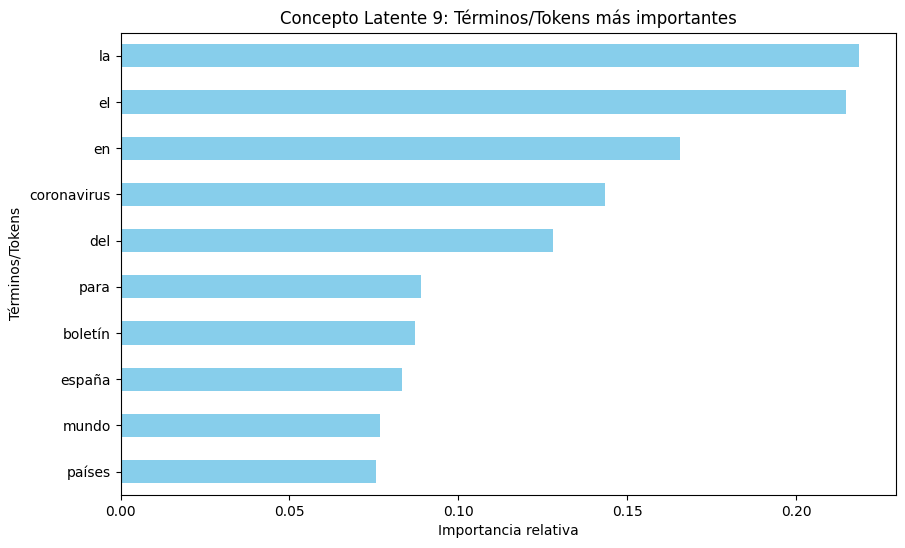

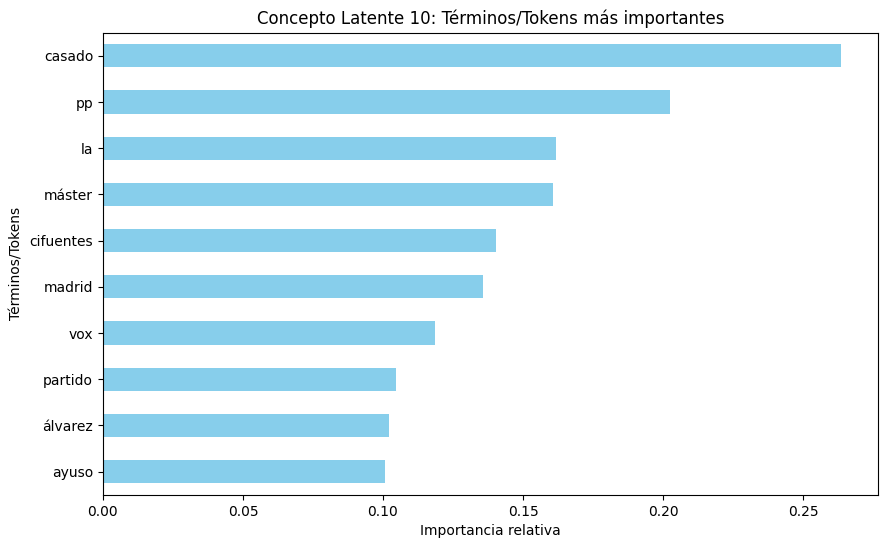

In [16]:
#Graficar los terminos importantes de conceto latente
def plot_top_tokens_for_topic(topic_df, topic_num):
    top_tokens = topic_df[f'Topic {topic_num}'].sort_values(ascending=False)[:10]
    plt.figure(figsize=(10, 6))
    top_tokens.plot(kind='barh', color='skyblue')
    plt.xlabel('Importancia relativa')
    plt.ylabel('Términos/Tokens')
    plt.title(f'Concepto Latente {topic_num}: Términos/Tokens más importantes')
    plt.gca().invert_yaxis()
    plt.show()

num_topics = 10

# Graficar y describir cada uno de los conceptos latentes
for i in range(1, num_topics + 1):
    plot_top_tokens_for_topic(term_topic_df, i)

#**PARTE 2 Pregunta - 7:**
Utiliza la librería Gensim para implementar ahora la técnica de LDA. Revisa la documentación
correspondiente y aplica de preferencia el modelo paralelizable:
https://radimrehurek.com/gensim/models/ldamodel.html
https://radimrehurek.com/gensim/models/ldamulticore.html

In [17]:
from gensim.corpora import Dictionary

# Cargar el modelo de spaCy para español
nlp = spacy.load("es_core_news_sm")

# Obtener stop words en español
stop_words_es = spacy.lang.es.stop_words.STOP_WORDS

# Crear el diccionario
id2word = Dictionary(df['tokens'])

# Filtrar tokens infrecuentes y muy frecuentes
id2word.filter_extremes(no_below=5, no_above=0.5)

# Filtrar stop words
id2word.filter_tokens(bad_ids=[id for id in id2word if id in stop_words_es])

# Convertir a formato Bag of Words (corpus)
corpus = [id2word.doc2bow(text) for text in df['tokens']]

In [18]:
# Entrenar el modelo LDA:
from gensim.models import LdaMulticore

# Definir el número de tópicos
num_topics = 10

# Entrenar el modelo LDA
lda_model = LdaMulticore(corpus=corpus,
                          id2word=id2word,
                          num_topics=num_topics,
                          random_state=100,
                          chunksize=10,
                          passes=10,
                          per_word_topics=True,
                          workers=4)

In [19]:
from pprint import pprint

# Imprimir los temas
pprint(lda_model.print_topics())

# Asignar el corpus al modelo LDA
for idx, topic in lda_model.print_topics(-1):
    print('Tema: {} \nPalabras: {}'.format(idx, topic))

[(0,
  '0.011*"tribunal" + 0.009*"juez" + 0.009*"investigación" + 0.009*"policía" + '
  '0.007*"judicial" + 0.007*"político" + 0.007*"miguel" + 0.006*"fiscalía" + '
  '0.006*"delito" + 0.006*"informe"'),
 (1,
  '0.021*"coronavirus" + 0.018*"persona" + 0.013*"dato" + 0.013*"covid" + '
  '0.011*"país" + 0.010*"virus" + 0.010*"pandemia" + 0.009*"número" + '
  '0.008*"salud" + 0.008*"prueba"'),
 (2,
  '0.010*"civil" + 0.009*"español" + 0.008*"país" + 0.008*"policía" + '
  '0.007*"persona" + 0.007*"españa" + 0.006*"canarias" + 0.006*"juan" + '
  '0.006*"guardia" + 0.005*"franco"'),
 (3,
  '0.027*"mujer" + 0.010*"persona" + 0.010*"sexual" + 0.009*"violencia" + '
  '0.009*"hombre" + 0.008*"género" + 0.007*"hijo" + 0.007*"familia" + '
  '0.007*"padre" + 0.006*"víctima"'),
 (4,
  '0.034*"millón" + 0.022*"euros" + 0.012*"público" + 0.012*"universidad" + '
  '0.012*"fiscal" + 0.011*"casado" + 0.011*"navarra" + 0.010*"máster" + '
  '0.010*"cifuent" + 0.009*"fondo"'),
 (5,
  '0.019*"empresa" + 0.01

In [20]:
from gensim.models import CoherenceModel

# Obtener los textos de la columna 'tokens'
textos = df['tokens'].tolist()

# Calcular la coherencia del modelo LDA
coherence_model_lda = CoherenceModel(model=lda_model, texts=textos, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherencia del modelo LDA: ', coherence_lda)


Coherencia del modelo LDA:  0.5294475975383477


#**PARTE 2 Pregunta - 8:**
Con base a esta técnica ¿qué cantidad de tópicos consideras que es la más adecuada? Compara tus
resultados con el método LSI. ¿Qué encuentras de coincidencias y diferencias? ¿Cuál consideras
puede ser el mejor resultado, es decir, cuál consideras puede ser la mejor cantidad de tópicos a
considerar?

Procesando tópicos: 100%|██████████| 3/3 [11:09<00:00, 223.31s/it]


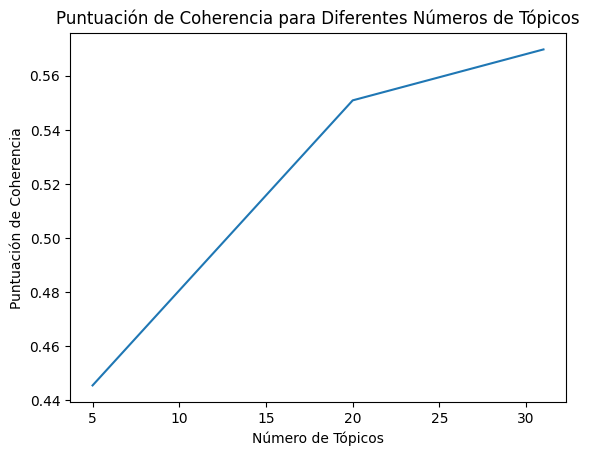

Mejor número de tópicos: 31
Mejor coherencia: 0.5697329027801162


In [24]:
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

num_topics_list = [5, 20, 31]
coherence_values = []

best_coherence = 0
best_num_topics = 0
best_lda_model = None

for num_topics in tqdm(num_topics_list, desc="Procesando tópicos"):
    lda_model = LdaMulticore(corpus=corpus,
                             id2word=id2word,
                             num_topics=num_topics,
                             random_state=100,
                             chunksize=100,  # Se establece el valor de chunksize
                             passes=10,      # Se establece el valor de passes
                             per_word_topics=True,
                             workers=4)

    coherence_model_lda = CoherenceModel(model=lda_model, texts=textos, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

    if coherence_lda > best_coherence:
        best_coherence = coherence_lda
        best_num_topics = num_topics
        best_lda_model = lda_model

plt.plot(num_topics_list, coherence_values)
plt.xlabel("Número de Tópicos")
plt.ylabel("Puntuación de Coherencia")
plt.title("Puntuación de Coherencia para Diferentes Números de Tópicos")
plt.show()

print('Mejor número de tópicos:', best_num_topics)
print('Mejor coherencia:', best_coherence)



### Mejor Cantidad de Tópicos

Con base en los resultados de coherencia, tanto para LDA como para LSI, parece que el mejor número de tópicos es 31, ya que maximiza la coherencia en ambos métodos. Sin embargo, es importante considerar no solo la coherencia, sino también la interpretabilidad de los temas. A veces, un número menor de temas puede ser más interpretable, incluso si la coherencia es ligeramente menor.

En conclusión, dado que la coherencia es más alta para LDA con 20 temas y considerando que este modelo generalmente ofrece una mejor captación de la estructura temática, se puede recomendar usar 20 temas con LDA como la mejor cantidad de tópicos a considerar.


### Coincidencias y Diferencias

**Coincidencias:**
- Tanto LDA como LSI muestran un incremento en la coherencia al aumentar el número de temas.
- Ambos métodos indican que un mayor número de temas (dentro del rango probado) tiende a mejorar la coherencia del modelo.

**Diferencias:**
- Los valores de coherencia de LDA son consistentemente más altos que los de LSI en este caso, lo que sugiere que LDA puede estar capturando mejor la estructura temática de los documentos en comparación con LSI.
- LDA es un modelo generativo que asume una distribución Dirichlet sobre los temas, mientras que LSI es un modelo algebraico basado en descomposición de matrices, lo que puede llevar a diferentes enfoques en la captación de temas.


#**PARTE 2 Pregunta - 9:**
Incluye tus conclusiones finales de la actividad.

La técnica de LDA es una herramienta poderosa para el análisis de temas en textos grandes y no estructurados. Su capacidad para descubrir temas latentes puede ser aplicada en diversas áreas, desde la investigación académica hasta el análisis de tendencias en redes sociales.
Es fundamental ajustar y evaluar los parámetros del modelo de manera iterativa para encontrar la configuración que mejor se adapte a los datos específicos y a los objetivos del análisis.
La comparación con otros métodos, como LSI, proporciona una perspectiva valiosa y puede ayudar a validar los resultados obtenidos.

##**Fin de la Actividad**